[*********************100%%**********************]  1 of 1 completed


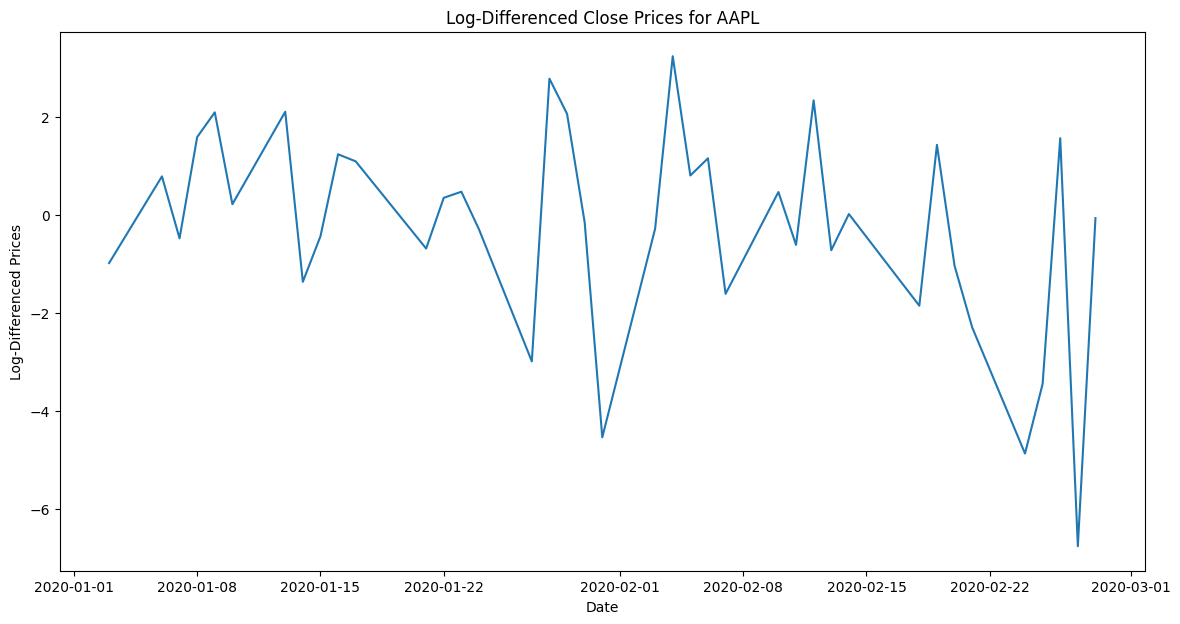

39

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2020-03-01')['Close']

# Transform the data: log and first difference
log_data = np.log(data)
diff_log_data = log_data.diff().dropna()*100

# Plot the transformed data
plt.figure(figsize=(14, 7))
plt.plot(diff_log_data)
plt.title(f'Log-Differenced Close Prices for {ticker}')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Prices')
plt.show()

# Convert to numpy array for use with the SVModel
transformed_data = diff_log_data.to_numpy()
transformed_data.size


In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the transition matrix with variables to estimate
# Initial guess for the transition probabilities
initial_guess = np.array([0.1, 0.4, 0.5, # State 1 transitions to 1, 2, 3
                          0.3, 0.3, 0.4, # State 2 transitions to 1, 2, 3
                          0.2, 0.5, 0.3]) # State 3 transitions to 1, 2, 3

# Define the likelihood function
# This is a placeholder function; you'll replace it with your actual likelihood function
def likelihood_function(transition_probs):
    # Calculate likelihood based on transition_probs
    # For the sake of example, this function just returns a dummy value
    for t in range(len(data))
    return -np.sum(transition_probs**2) # Normally, this would involve calculations based on observed data

# Constraint: the rows of the transition matrix must sum to 1
def row_sum_constraint(transition_probs):
    return np.array([sum(transition_probs[0:3]) - 1,
                     sum(transition_probs[3:6]) - 1,
                     sum(transition_probs[6:9]) - 1])

# Define the constraints and bounds for optimization
constraints = ({'type': 'eq', 'fun': row_sum_constraint})
bounds = [(0, 1)] * 9 # Each probability must be between 0 and 1

# Perform the optimization to maximize the likelihood (minimize the negative likelihood)
result = minimize(lambda x: -likelihood_function(x), initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Reshape the result into a 3x3 transition matrix
optimized_transition_matrix = result.x.reshape((3, 3))

print("Optimized Transition Matrix:")
print(optimized_transition_matrix)


Optimized Transition Matrix:
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333334]]


In [4]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# Example observed data for transitions: [from state 1 to 1, 1 to 2, ..., 3 to 2, 3 to 3]
# This is just placeholder data; you'll replace it with your actual data
data = transformed_data
# Initial guess for the transition probabilities and variance (variance is the last element)
initial_guess = np.array([0.1, 0.4, 0.5, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 1.0]) # Last element is variance

# Define the Gaussian likelihood function
def gaussian_likelihood(params):
    # Extract transition probabilities and variance from parameters
    transition_probs = params[:-1] # All but last element
    variance = params[-1] # Last element is variance
    
    # Calculate expected transitions based on transition probabilities
    # Assuming 'data' represents counts, convert probabilities to expected counts
    total_counts = data.sum() / 3 # Total counts per state (assuming uniform distribution for simplicity)
    expected_transitions = transition_probs * total_counts
    
    # Calculate the Gaussian likelihood of observing the data
    # Using the PDF of the normal distribution for simplicity
    likelihood = np.prod(norm.pdf(data, expected_transitions, np.sqrt(variance)))
    
    # Return the negative log-likelihood (since we minimize in the optimization)
    return -np.log(likelihood)

# Constraint: the rows of the transition matrix must sum to 1
def row_sum_constraint(params):
    transition_probs = params[:-1] # Exclude variance
    return np.array([sum(transition_probs[0:3]) - 1,
                     sum(transition_probs[3:6]) - 1,
                     sum(transition_probs[6:9]) - 1])

# Define the constraints and bounds for optimization
constraints = ({'type': 'eq', 'fun': row_sum_constraint})
bounds = [(0, 1)] * 9 + [(0.01, None)] # Bounds for transition probabilities and variance

# Perform the optimization to maximize the likelihood (minimize the negative likelihood)
result = minimize(gaussian_likelihood, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimized transition probabilities and variance
optimized_params = result.x
optimized_transition_matrix = optimized_params[:-1].reshape((3, 3))
optimized_variance = optimized_params[-1]

print("Optimized Transition Matrix:")
print(optimized_transition_matrix)
print("\nOptimized Variance:", optimized_variance)


ValueError: operands could not be broadcast together with shapes (39,) (9,) 